In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [4]:
#file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
#file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/ATMs.csv'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_ATMs = '../Datasets/ATMs.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO' : 'Antonio Nariño',
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [7]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

In [8]:
MapaLocalidades['Localidad'] = MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2'] = MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

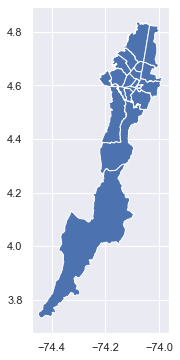

In [9]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base TM

In [10]:
df_atms = pd.read_csv(filepath_ATMs, usecols=[1,2,3,4,5])
df_atms

,atm_class,atm_name,atm_address,atm_latitude,atm_longitude
0,cajero-bancolombia,Cajero Bancolombia Éxito calle 170,Calle 172 # 41-63,4.755227,-74.044064
1,cajero-bancolombia,Cajero Bancolombia Centro Comercial Arizona,Carrera 58A # 167-58,4.750195,-74.059771
2,cajero-bancolombia,Cajero Bancolombia Calle 13,Calle 13 # 13-71,4.716253,-74.212663
3,cajero-bancolombia,Cajero Bancolombia Éxito Express Carrera 7 con 45,Carrera 7 # 45-19,4.631583,-74.064275
4,cajero-bancolombia,Cajero Automatico Bancolombia Exito Quirinal,Calle 60 # 56A-40,4.653869,-74.086624
...,...,...,...,...,...
3373,cajeros-banco-de-occidente,Cajero Banco de Occidente Almacén Romi La Vict...,Avenida Carrera 45 # 150-09,4.732043,-74.050057
3374,cajeros-banco-de-occidente,Cajero Banco de Occidente Tecnológico Arrecife,Calle 26 # 69D-91,4.661075,-74.108987
3375,cajeros-banco-de-occidente,Cajero Banco de Occidente Teusaquillo,Carrera 13 # 38-60,4.627227,-74.067155
3376,cajeros-banco-de-occidente,Cajero Banco de Occidente Oficina Fundación Sa...,Carrera 9 # 116-20,4.694274,-74.034336


In [11]:
df_atms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   atm_class      3378 non-null   object 
 1   atm_name       3378 non-null   object 
 2   atm_address    3378 non-null   object 
 3   atm_latitude   3378 non-null   float64
 4   atm_longitude  3378 non-null   float64
dtypes: float64(2), object(3)
memory usage: 132.1+ KB


In [12]:
gdf = gpd.GeoDataFrame(df_atms, geometry=gpd.points_from_xy(df_atms.atm_longitude, df_atms.atm_latitude))
gdf

,atm_class,atm_name,atm_address,atm_latitude,atm_longitude,geometry
0,cajero-bancolombia,Cajero Bancolombia Éxito calle 170,Calle 172 # 41-63,4.755227,-74.044064,POINT (-74.04406 4.75523)
1,cajero-bancolombia,Cajero Bancolombia Centro Comercial Arizona,Carrera 58A # 167-58,4.750195,-74.059771,POINT (-74.05977 4.75020)
2,cajero-bancolombia,Cajero Bancolombia Calle 13,Calle 13 # 13-71,4.716253,-74.212663,POINT (-74.21266 4.71625)
3,cajero-bancolombia,Cajero Bancolombia Éxito Express Carrera 7 con 45,Carrera 7 # 45-19,4.631583,-74.064275,POINT (-74.06428 4.63158)
4,cajero-bancolombia,Cajero Automatico Bancolombia Exito Quirinal,Calle 60 # 56A-40,4.653869,-74.086624,POINT (-74.08662 4.65387)
...,...,...,...,...,...,...
3373,cajeros-banco-de-occidente,Cajero Banco de Occidente Almacén Romi La Vict...,Avenida Carrera 45 # 150-09,4.732043,-74.050057,POINT (-74.05006 4.73204)
3374,cajeros-banco-de-occidente,Cajero Banco de Occidente Tecnológico Arrecife,Calle 26 # 69D-91,4.661075,-74.108987,POINT (-74.10899 4.66107)
3375,cajeros-banco-de-occidente,Cajero Banco de Occidente Teusaquillo,Carrera 13 # 38-60,4.627227,-74.067155,POINT (-74.06716 4.62723)
3376,cajeros-banco-de-occidente,Cajero Banco de Occidente Oficina Fundación Sa...,Carrera 9 # 116-20,4.694274,-74.034336,POINT (-74.03434 4.69427)


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   atm_class      3378 non-null   object  
 1   atm_name       3378 non-null   object  
 2   atm_address    3378 non-null   object  
 3   atm_latitude   3378 non-null   float64 
 4   atm_longitude  3378 non-null   float64 
 5   geometry       3378 non-null   geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 158.5+ KB


In [14]:
MapaLocalidades.columns

Index(['Localidad', 'Acto_Administrativo', 'Area', 'ID_Number', 'geometry'], dtype='object')

In [19]:
#base1 = gpd.sjoin(gdf,MapaLocalidades[['geometry','Nombre_Localidad','geometry2']], how='left',op='within')
baseATMs = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
baseATMs

,atm_class,atm_name,atm_address,atm_latitude,atm_longitude,geometry,index_right,Localidad
0,cajero-bancolombia,Cajero Bancolombia Éxito calle 170,Calle 172 # 41-63,4.755227,-74.044064,POINT (-74.04406 4.75523),16.0,Usaquén
1,cajero-bancolombia,Cajero Bancolombia Centro Comercial Arizona,Carrera 58A # 167-58,4.750195,-74.059771,POINT (-74.05977 4.75020),7.0,Suba
2,cajero-bancolombia,Cajero Bancolombia Calle 13,Calle 13 # 13-71,4.716253,-74.212663,POINT (-74.21266 4.71625),NaN,NaN
3,cajero-bancolombia,Cajero Bancolombia Éxito Express Carrera 7 con 45,Carrera 7 # 45-19,4.631583,-74.064275,POINT (-74.06428 4.63158),5.0,Chapinero
4,cajero-bancolombia,Cajero Automatico Bancolombia Exito Quirinal,Calle 60 # 56A-40,4.653869,-74.086624,POINT (-74.08662 4.65387),13.0,Teusaquillo
...,...,...,...,...,...,...,...,...
3373,cajeros-banco-de-occidente,Cajero Banco de Occidente Almacén Romi La Vict...,Avenida Carrera 45 # 150-09,4.732043,-74.050057,POINT (-74.05006 4.73204),7.0,Suba
3374,cajeros-banco-de-occidente,Cajero Banco de Occidente Tecnológico Arrecife,Calle 26 # 69D-91,4.661075,-74.108987,POINT (-74.10899 4.66107),2.0,Fontibón
3375,cajeros-banco-de-occidente,Cajero Banco de Occidente Teusaquillo,Carrera 13 # 38-60,4.627227,-74.067155,POINT (-74.06716 4.62723),0.0,Santa Fe
3376,cajeros-banco-de-occidente,Cajero Banco de Occidente Oficina Fundación Sa...,Carrera 9 # 116-20,4.694274,-74.034336,POINT (-74.03434 4.69427),16.0,Usaquén


In [16]:
baseATMs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3378 entries, 0 to 3377
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   atm_class      3378 non-null   object  
 1   atm_name       3378 non-null   object  
 2   atm_address    3378 non-null   object  
 3   atm_latitude   3378 non-null   float64 
 4   atm_longitude  3378 non-null   float64 
 5   geometry       3378 non-null   geometry
 6   index_right    3368 non-null   float64 
 7   Localidad      3368 non-null   object  
dtypes: float64(3), geometry(1), object(4)
memory usage: 237.5+ KB


<AxesSubplot:>

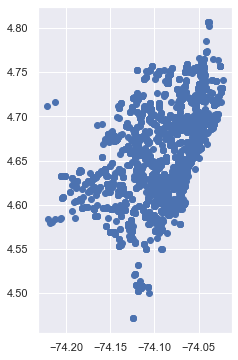

In [17]:
baseATMs.geometry.plot(figsize=(12,6))

<AxesSubplot:>

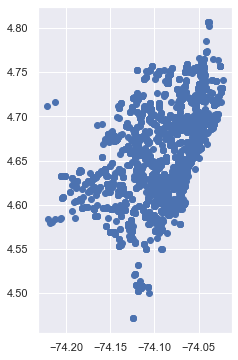

In [18]:
baseATMs.geometry.plot(figsize=(12,6))

In [21]:
ATMsLocalidades = pd.DataFrame(baseATMs.drop(columns=['index_right','geometry']))

In [22]:
ATMsLocalidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   atm_class      3378 non-null   object 
 1   atm_name       3378 non-null   object 
 2   atm_address    3378 non-null   object 
 3   atm_latitude   3378 non-null   float64
 4   atm_longitude  3378 non-null   float64
 5   Localidad      3368 non-null   object 
dtypes: float64(2), object(4)
memory usage: 184.7+ KB


In [23]:
ATMsLocalidades.to_csv('../Datasets Clean/ATMsLocalidades.csv', index=False)